# Modificacion de Tablas

Las tablas que tenemos son:
1. Activos: Informacion de cada activo
2. Historico Adjuntos Activos OT: Match de que activo corresponde a que .txt, e informacion de la orden de trabajo fuera del reporte
3. Registros ordenes de Trabajo: Informacion de ordenes de trabajo, incluidas los reportes en formato html

In [1]:
import numpy as np
import pandas as pd
import prettytable as pt

In [2]:
activos = pd.read_csv('/home/jovyan/work/EPM/Data/Activos.csv', delimiter=';')

In [3]:
hist_ots = pd.read_csv('/home/jovyan/work/EPM/Data/HistoricoAdjuntosActivosOT.csv', delimiter=';')

In [4]:
ots = pd.read_excel('/home/jovyan/work/EPM/Data/RegistrosOrdenesDeTrabajo.xlsx')

In [5]:
cols = pt.PrettyTable()
cols.add_column('Activos', activos.columns.tolist())
cols.add_column('Hist OTs', hist_ots.columns.tolist()+ [''])
cols.add_column('OTs', ots.columns.tolist())
print(cols)

+------------------+------------------+-------------+
|     Activos      |     Hist OTs     |     OTs     |
+------------------+------------------+-------------+
|     ASSETNUM     |     ASSETNUM     |    WONUM    |
|   DESCRIPTION    |   SLXNUMACTEXT   | DESCRIPTION |
|     ASSETTAG     |  SLXDESCACTEXT   |   ASSETNUM  |
|     LOCATION     |     WORKTYPE     |   WORKTYPE  |
|  SLXJDETECNICO   |    SLXNUMTOT     |  REPORTDATE |
|   INSTALLDATE    |    SLXDESCOT     |   ACTSTART  |
|      STATUS      | SLXFECCREACIONOT |  ACTFINISH  |
|      SITEID      |  SLXFECINICIOOT  |   PROBLEM   |
|     PRIORITY     |   SLXFECFINOT    |    CAUSE    |
| CLASSSTRUCTUREID |     DOCUMENT     |    REMEDY   |
|  CLASSSTRUCTURE  |                  |   WORKLOG   |
+------------------+------------------+-------------+


# Agregamos a la tabla de Historico de ordenes de trabajo el Reporte en texto libre correspondiente

In [6]:
# Modificaciones al nombre de archivo para asegurar que sea como el del txt
hist_ots['DOCUMENT'] = hist_ots['DOCUMENT'].replace('ISTORIA', 'istoria', regex = True)
hist_ots['DOCUMENT'] = hist_ots['DOCUMENT'].apply(str.strip)

In [7]:
#Creamos una columna vacia por ahora
hist_ots['WORKLOG'] = ''

for i in range(len(hist_ots.DOCUMENT)):
    filename = hist_ots.DOCUMENT[i]         # Leemos el nombre de archivo para cada una
    
    try:
        lineas = []                             # Lista vacía para guardar el contenido
        with open (fr'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\Repoo\Data\HISTORICOS_OT\{filename}.txt', 'rt') as worklog:  # Abre el .txt
            for linea in worklog:               # Lee linea por linea
                lineas.append(linea)            # Guarda la linea como elemento de la lista
        
        worklog = ''.join(lineas)               # Juntamos en un string

        hist_ots.WORKLOG[i] = worklog           # Asignamos el worklog a la entrada correspondiente

    except:
        i =+ 1 

In [8]:
# Reemplazamos los caracteres \n (new line) con espacios
hist_ots['WORKLOG'] = hist_ots['WORKLOG'].replace('\n', ' ', regex = True)

In [9]:
# Volvemos NA lo que quedo vacío
vacio_a_na = {'': np.nan}
hist_ots['WORKLOG'] = hist_ots['WORKLOG'].replace(vacio_a_na)

In [10]:
# Miramos la cantidad de vacios
hist_ots.WORKLOG.isna().sum()

58391

In [11]:
# Comparamos con los vacios del repositorio, con una muestra random de la mitad:
vacios = ['HistoriaJDE_OT_3815495.txt',
          'HistoriaJDE_OT_3816996.txt',
          'HistoriaJDE_OT_3818147.txt',
          'HistoriaJDE_OT_3818153.txt',
          'HistoriaJDE_OT_3821964.txt',
          'HistoriaJDE_OT_3824321.txt',
          'HistoriaJDE_OT_3824493.txt',
          'HistoriaJDE_OT_3825889.txt',
          'HistoriaJDE_OT_3826393.txt',
          'HistoriaJDE_OT_3829275.txt',
          'HistoriaJDE_OT_3832219.txt',
          'HistoriaJDE_OT_3834917.txt']

In [12]:
hist_ots.loc[hist_ots.DOCUMENT.isin(vacios)]

,ASSETNUM,SLXNUMACTEXT,SLXDESCACTEXT,WORKTYPE,SLXNUMTOT,SLXDESCOT,SLXFECCREACIONOT,SLXFECINICIOOT,SLXFECFINOT,DOCUMENT,WORKLOG


Segun el repositorio, hay 1301 vacios, que parece que no estaban en la tabla. Y parece que hay 9908 en la tabla que no coinciden con ningun .txt. 

(Total de archivos .txt - vacios) = (Total del filas del data frame - NaN en la columna de worklog)?

In [13]:
import os
import glob

#Obtenemos el total de los archivos
files = os.listdir('/home/jovyan/work/EPM/Data/HISTORICOS_OT')

(len(files) - 1301) == (len(hist_ots.DOCUMENT) - 9908)

False

In [14]:
# Archivos con info en la carpeta
len(files) - 1301

53065

In [15]:
# Archivos con info en la tabla de viejos modificada
len(hist_ots.DOCUMENT) - 9908

48483

In [16]:
#Segun esto hay unos 5k .txt que no estan en la tabla? 
53065 - 48483

4582

In [17]:
#miramos los 9k que si estan pero no tienen .txt
hist_ots.DOCUMENT.loc[hist_ots.WORKLOG.isna()]

0        HistoriaJDE_01312033_OT_1000740
1        HistoriaJDE_01312033_OT_1001233
2        HistoriaJDE_01312033_OT_1001382
3        HistoriaJDE_01312033_OT_1001383
4        HistoriaJDE_01312033_OT_1001386
                      ...               
58386             HistoriaJDE_OT_3852163
58387             HistoriaJDE_OT_3852165
58388             HistoriaJDE_OT_3852167
58389             HistoriaJDE_OT_3852185
58390             HistoriaJDE_OT_3852186
Name: DOCUMENT, Length: 58391, dtype: object

In [18]:
faltantes = hist_ots.DOCUMENT.loc[hist_ots.WORKLOG.isna()]

good_docs = []
for doc in faltantes:
    if len(doc) < 27: good_docs.append(doc)

In [19]:
good_docs

['HistoriaJDE_OT_2213651',
 'HistoriaJDE_OT_2213652',
 'HistoriaJDE_OT_2213654',
 'HistoriaJDE_OT_2213663',
 'HistoriaJDE_OT_2214642',
 'HistoriaJDE_OT_2214646',
 'HistoriaJDE_OT_2214660',
 'HistoriaJDE_OT_2215272',
 'HistoriaJDE_OT_2215302',
 'HistoriaJDE_OT_2215307',
 'HistoriaJDE_OT_2215324',
 'HistoriaJDE_OT_2215338',
 'HistoriaJDE_OT_2215362',
 'HistoriaJDE_OT_2215388',
 'HistoriaJDE_OT_2215716',
 'HistoriaJDE_OT_2215728',
 'HistoriaJDE_OT_2215758',
 'HistoriaJDE_OT_2216251',
 'HistoriaJDE_OT_2216693',
 'HistoriaJDE_OT_2216926',
 'HistoriaJDE_OT_2217019',
 'HistoriaJDE_OT_2218520',
 'HistoriaJDE_OT_2219337',
 'HistoriaJDE_OT_2222652',
 'HistoriaJDE_OT_2222683',
 'HistoriaJDE_OT_2222968',
 'HistoriaJDE_OT_2227769',
 'HistoriaJDE_OT_2227833',
 'HistoriaJDE_OT_2227834',
 'HistoriaJDE_OT_2227836',
 'HistoriaJDE_OT_2227840',
 'HistoriaJDE_OT_2228223',
 'HistoriaJDE_OT_2228512',
 'HistoriaJDE_OT_2228874',
 'HistoriaJDE_OT_2229502',
 'HistoriaJDE_OT_2229541',
 'HistoriaJDE_OT_2229601',
 

In [20]:
# Parece que solo se está saltando ese por x o y motivo, lo agregamos y ya
hist_ots.WORKLOG.loc[hist_ots.DOCUMENT == 'HistoriaJDE_OT_3641553'] = 'Fecha: Noviembre 15/2017 Programo: Daniel Palacios O.Ejecuto: Jairo Torres y Frank Córdoba. Se realiza inspección y limpieza al barraje de salida, se realiza inspección y mantenimiento a mallas separadoras del barraje, baquelitas separadoras de barras, conexiones entre barras y estado del aislamiento, también se revisan el estado de los CTLs, de sus conexiones eléctricas en el tablero +CCCTS. Trabajo ejecutado por: Jairo Torres y Frank Córdoba. XE: LIMPIAR E INSPECCIONAR BARRAJE ESTATOR GENERADOR UNIDAD'


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
# Viejos que están en la tabla pero no en los .txt
hist_ots.WORKLOG.isna().sum()

58390

In [22]:
# Todos los nombres de nuestros .txt son de 26 caracteres, miramos que no haya quedado ninguno de esos sin worklog en la tabla
set(hist_ots.DOCUMENT.loc[hist_ots.WORKLOG.isna()].apply(len))

{22, 29, 30, 31}

In [23]:
hist_ots

,ASSETNUM,SLXNUMACTEXT,SLXDESCACTEXT,WORKTYPE,SLXNUMTOT,SLXDESCOT,SLXFECCREACIONOT,SLXFECINICIOOT,SLXFECFINOT,DOCUMENT,WORKLOG
0,2977237.0,2879,CIRCUITOS ALUMBRADO C/M TS-ALUMBRADO TOMAS 220...,MP,1000740,REVISION GENERAL,14/2/2007,14/2/2007,14/2/2007,HistoriaJDE_01312033_OT_1000740,NaN
1,2976789.0,2878,CIRCUITOS ALUMBRADO C/V TS-ALUMBRADO TOMAS 480...,MP,1001233,REVISION GENRAL,15/2/2007,15/2/2007,15/2/2007,HistoriaJDE_01312033_OT_1001233,NaN
2,NaN,2907,INTERCAMBIADOR PLACAS 2 U1 TS-MARCA ALFA-LAVA-...,MP,1001382,LAVAR INT PLACAS 2 U1 TS,16/2/2007,16/2/2007,16/2/2007,HistoriaJDE_01312033_OT_1001382,NaN
3,2977052.0,3069,TABLERO TURBINA U2 TS-MARCA NEYRPIC---,CPROG,1001383,MALA SEÑALIZ TABL TURB U1 TS,16/2/2007,16/2/2007,16/2/2007,HistoriaJDE_01312033_OT_1001383,NaN
4,2977266.0,2955,MOTOBOMBA 2 AGUA FRIA TS-MARCA SIHI-HALB-SISTE...,CPROG,1001386,FUGA AGUA PRENSOEST AFFA-2 TS,16/2/2007,16/2/2007,16/2/2007,HistoriaJDE_01312033_OT_1001386,NaN
...,...,...,...,...,...,...,...,...,...,...,...
58386,NaN,355796,ESTACION PALMAS SAN ROQUE HC-CODIGO IDEAM 2308...,CPROG,3852163,REALIZAR MTTO PREVENTIVO,9/7/2019,9/7/2019,NaN,HistoriaJDE_OT_3852163,NaN
58387,NaN,355792,ESTACION SAN ROQUE HC-CODIGO IDEAM 2308050-TIP...,CPROG,3852165,REALIZAR MTTO PREVENTIVO,9/7/2019,9/7/2019,NaN,HistoriaJDE_OT_3852165,NaN
58388,NaN,355802,ESTACION VERSALLES HC-CODIGO IDEAM 2310011-TIP...,CPROG,3852167,REALIZAR MTTO PREVENTIVO,9/7/2019,9/7/2019,NaN,HistoriaJDE_OT_3852167,NaN
58389,NaN,355809,ESTACION EL ZAFIRO HC-CODIGO IDEAM 2701994-TIP...,CPROG,3852185,REALIZAR MTTO PREVENTIVO,9/7/2019,9/7/2019,NaN,HistoriaJDE_OT_3852185,NaN


In [24]:
# ahora si, guardo el csv
hist_ots.to_csv('historico_OTs_texto_libre.csv')


# Quitamos las tag html de la tabla de Historico reciente de OTs

In [25]:
import html2text

In [26]:
ots['WORKLOG'] = ots['WORKLOG'].apply(html2text.html2text)

In [27]:
# Reemplazamos los caracteres \n (new line) con espacios
ots['WORKLOG'] = ots['WORKLOG'].replace('\n', ' ', regex = True)

In [28]:
# Total de entradas en la tabla de nuevos
len(ots.WORKLOG)

19319

In [29]:
# Sin info en la tabla de nuevos
ots.WORKLOG.isna().sum()

0

In [30]:
ots.head()

,WONUM,DESCRIPTION,ASSETNUM,WORKTYPE,REPORTDATE,ACTSTART,ACTFINISH,PROBLEM,CAUSE,REMEDY,WORKLOG
0,81187,R/V SOFTWARE SCADA LA TASAJERA,2977213,CPROG,2018-07-17 09:13:14.999,2018-08-01 10:58:12.000,2018-12-20 08:25:17.999,CONTROL DEFICIENTE,CABLE DE PUESTA A TIERRA SUELTO,CONECTAR,AJUSTE DE LA HORA EN SCADA. Lo primero que se...
1,81011,LAVAR JUEGO DE PLACAS,2976926,CPROG,2018-07-17 07:35:10.999,2018-07-16 06:59:59.999,2018-07-17 10:20:17.999,OBSTRUCCION,ELEMENTOS EXTRANOS O CONTAMINANTES EN EL FLUIDO,LIMPIAR,** JUL 16/2018 OT: 81011 PROGRAMO: WPARRAR EJ...
2,82516,R/P REPARAR VALVULA MANUAL DEL BY-PASS,2976936,CINME,2018-07-18 15:06:53.999,2018-11-26 06:59:59.999,2018-11-26 12:59:59.999,RETORNO NO ACCIONADO,FUGA,REPARAR,SOLICITANTE: REPARAR LA VALVULA MANUAL DE GUA...
3,82567,REPARAR AGUJAS DE REPUESTO,2976937,CINME,2018-07-18 15:50:47.999,2018-07-18 15:50:47.999,2020-12-04 10:44:12.000,"DANO EN RECUBRIMIENTO, ABOLLADURA, DEFORMACION","DESPLAZAMIENTO DEL TERRENO, DESLIZAMIENTO, ERO...",REPARAR,**JUL 18/2018 OT: 82567 PROGRAMO: WPARRAR EJEC...
4,83539,CORREGIR FUGA DE ACEITE CGI - U1,2976933,CINME,2018-07-19 14:43:19.999,2018-07-19 14:43:21.000,2018-08-08 10:42:17.000,FUGA,"FALLA EN ACCESORIO (VALVULA, SELLO, EMPAQUE, B...",CAMBIAR,SOLICITANTE: CORREGIR FUGA DE ACEITE EN EL CO...


In [31]:
# Guardo el csv
ots.to_csv('historico_OTs_recientes.csv')

# Tabla que relacione activo, fecha y reporte

In [32]:
viejos = hist_ots[['ASSETNUM','SLXNUMTOT','SLXFECINICIOOT','SLXFECFINOT','WORKLOG']]
nuevos = ots[['ASSETNUM','WONUM','ACTSTART','ACTFINISH','WORKLOG']]

In [33]:
viejos['ANTIGUEDAD'] = 'Antiguo'
nuevos['ANTIGUEDAD'] = 'Reciente'

<ipython-input-33-e0d489eae3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viejos['ANTIGUEDAD'] = 'Antiguo'
<ipython-input-33-e0d489eae3e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevos['ANTIGUEDAD'] = 'Reciente'


In [34]:
viejos = viejos.rename(columns={'SLXNUMTOT': 'WONUM','SLXFECINICIOOT': 'ACTSTART','SLXFECFINOT':'ACTFINISH'})

In [35]:
viejos.WORKLOG.isna().sum()

58390

In [36]:
viejos['ACTSTART'] = pd.to_datetime(viejos['ACTSTART'])
viejos['ACTFINISH'] = pd.to_datetime(viejos['ACTFINISH'])
viejos['ASSETNUM'] = viejos['ASSETNUM'].astype('object')

nuevos['ACTSTART'] = pd.to_datetime(nuevos['ACTSTART'])
nuevos['ACTFINISH'] = pd.to_datetime(nuevos['ACTFINISH'])
nuevos['ASSETNUM'] = nuevos['ASSETNUM'].astype('object')

<ipython-input-36-e846cb2f7993>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevos['ACTSTART'] = pd.to_datetime(nuevos['ACTSTART'])
<ipython-input-36-e846cb2f7993>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevos['ACTFINISH'] = pd.to_datetime(nuevos['ACTFINISH'])
<ipython-input-36-e846cb2f7993>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [37]:
todos = viejos.append(nuevos, ignore_index=True)
todos = todos.sort_values(by = ['ASSETNUM', 'ACTSTART'])

In [38]:
todos.head()

,ASSETNUM,WONUM,ACTSTART,ACTFINISH,WORKLOG,ANTIGUEDAD
9612,2976773.0,93702,2001-03-23 00:00:00.000,2001-03-23 00:00:00,NaN,Antiguo
2982,2976773.0,2192875,2012-11-16 00:00:00.000,2012-11-16 00:00:00,NaN,Antiguo
1053,2976774.0,1361312,2009-02-27 00:00:00.000,2009-02-27 00:00:00,NaN,Antiguo
67067,2976775,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24,10/03/2020 Se verifica el funcionamiento del ...,Reciente
69078,2976775,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24,REVISAR ARCHIVO ADJUNTO.,Reciente


In [39]:
todos.isna().WORKLOG.sum()

58390

In [40]:
todos.to_csv('relacion_ots_activo.csv', na_rep = 'Reporte No Disponible')

# Visualizaciones

In [42]:
activos = pd.read_csv('/home/jovyan/work/EPM/Data/Activos.csv', delimiter=';')
hist_ots = pd.read_csv('/home/jovyan/work/EPM/Data/HistoricoAdjuntosActivosOT.csv', delimiter=';')
ots = pd.read_excel('/home/jovyan/work/EPM/Data/RegistrosOrdenesDeTrabajo.xlsx')
todas_ots = pd.read_csv('/home/jovyan/work/EPM/Data/DataSetsProcesados/Relacion_ots_activo.csv')

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
hist_ots.head()

,ASSETNUM,SLXNUMACTEXT,SLXDESCACTEXT,WORKTYPE,SLXNUMTOT,SLXDESCOT,SLXFECCREACIONOT,SLXFECINICIOOT,SLXFECFINOT,DOCUMENT
0,2977237.0,2879,CIRCUITOS ALUMBRADO C/M TS-ALUMBRADO TOMAS 220...,MP,1000740,REVISION GENERAL,14/2/2007,14/2/2007,14/2/2007,HISTORIAJDE_01312033_OT_1000740
1,2976789.0,2878,CIRCUITOS ALUMBRADO C/V TS-ALUMBRADO TOMAS 480...,MP,1001233,REVISION GENRAL,15/2/2007,15/2/2007,15/2/2007,HISTORIAJDE_01312033_OT_1001233
2,NaN,2907,INTERCAMBIADOR PLACAS 2 U1 TS-MARCA ALFA-LAVA-...,MP,1001382,LAVAR INT PLACAS 2 U1 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001382
3,2977052.0,3069,TABLERO TURBINA U2 TS-MARCA NEYRPIC---,CPROG,1001383,MALA SEÑALIZ TABL TURB U1 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001383
4,2977266.0,2955,MOTOBOMBA 2 AGUA FRIA TS-MARCA SIHI-HALB-SISTE...,CPROG,1001386,FUGA AGUA PRENSOEST AFFA-2 TS,16/2/2007,16/2/2007,16/2/2007,HISTORIAJDE_01312033_OT_1001386


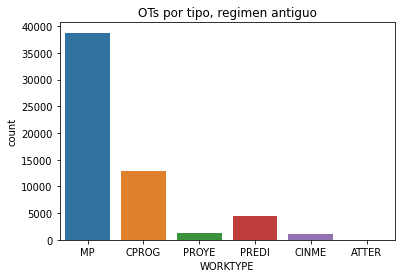

In [45]:
sns.countplot(x = hist_ots.WORKTYPE)
plt.title('OTs por tipo, regimen antiguo')
plt.show();

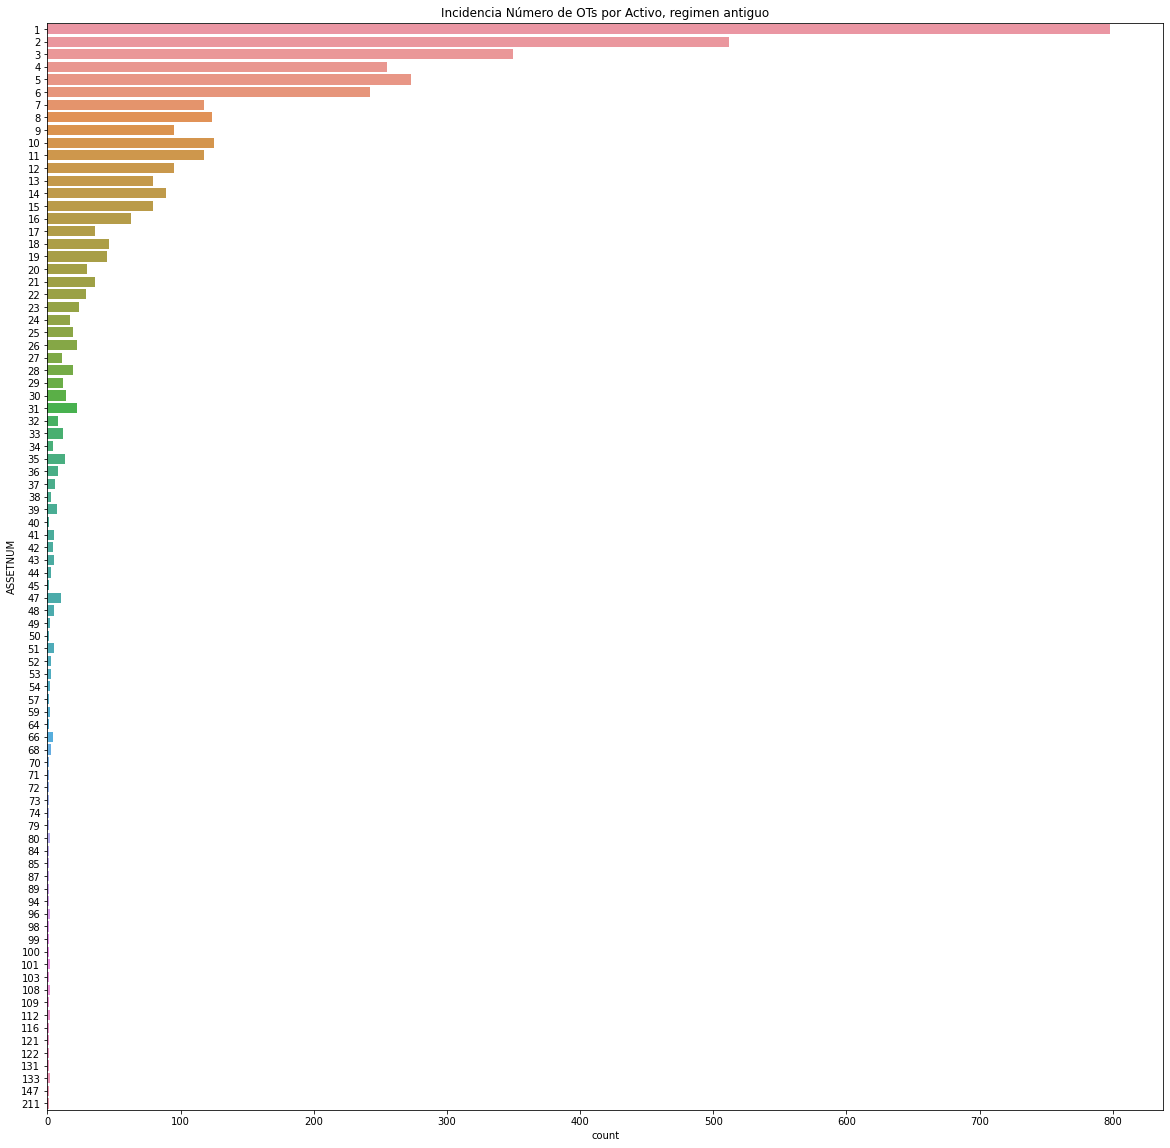

In [47]:
plt.figure(figsize = (20, 20))
sns.countplot(y = pd.DataFrame(hist_ots.ASSETNUM.value_counts()).ASSETNUM)
plt.title('Incidencia Número de OTs por Activo, regimen antiguo')
#plt.xticks(rotation = 90)
plt.show();

In [48]:
by_date = pd.DataFrame(hist_ots.SLXFECCREACIONOT.value_counts())
by_date['date'] = by_date.index
by_date['date'] = pd.to_datetime(by_date['date'])
by_date.sort_values(by = 'date', inplace = True)

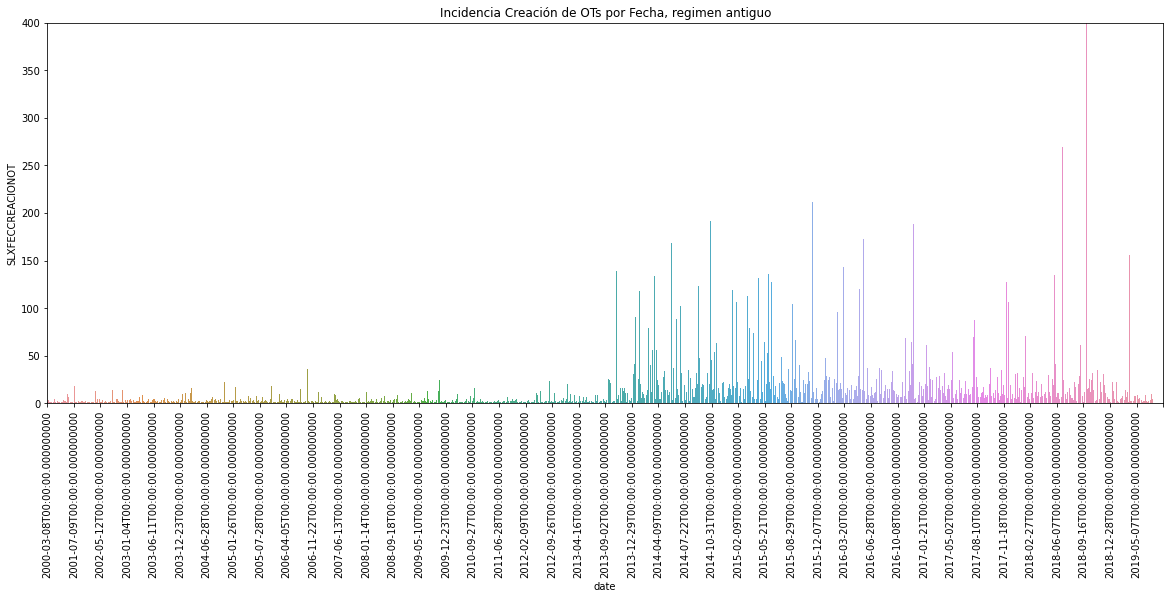

In [49]:
plt.figure(figsize = (20, 7))
sns.barplot(y = 'SLXFECCREACIONOT', x = 'date', data = by_date)
plt.title('Incidencia Creación de OTs por Fecha, regimen antiguo')
plt.xticks(np.arange(4300, step = 100), rotation = 90)
plt.ylim(0,400)
plt.show();

In [50]:
ots.head()

,WONUM,DESCRIPTION,ASSETNUM,WORKTYPE,REPORTDATE,ACTSTART,ACTFINISH,PROBLEM,CAUSE,REMEDY,WORKLOG
0,81187,R/V SOFTWARE SCADA LA TASAJERA,2977213,CPROG,2018-07-17 09:13:14.999,2018-08-01 10:58:12.000,2018-12-20 08:25:17.999,CONTROL DEFICIENTE,CABLE DE PUESTA A TIERRA SUELTO,CONECTAR,<html><div>AJUSTE DE LA HORA EN SCADA.</div><d...
1,81011,LAVAR JUEGO DE PLACAS,2976926,CPROG,2018-07-17 07:35:10.999,2018-07-16 06:59:59.999,2018-07-17 10:20:17.999,OBSTRUCCION,ELEMENTOS EXTRANOS O CONTAMINANTES EN EL FLUIDO,LIMPIAR,"<html><font size=""2""> </font>\n<b>\n <font fa..."
2,82516,R/P REPARAR VALVULA MANUAL DEL BY-PASS,2976936,CINME,2018-07-18 15:06:53.999,2018-11-26 06:59:59.999,2018-11-26 12:59:59.999,RETORNO NO ACCIONADO,FUGA,REPARAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>R..."
3,82567,REPARAR AGUJAS DE REPUESTO,2976937,CINME,2018-07-18 15:50:47.999,2018-07-18 15:50:47.999,2020-12-04 10:44:12.000,"DANO EN RECUBRIMIENTO, ABOLLADURA, DEFORMACION","DESPLAZAMIENTO DEL TERRENO, DESLIZAMIENTO, ERO...",REPARAR,"<html><font color=""#000000"" face=""Times New Ro..."
4,83539,CORREGIR FUGA DE ACEITE CGI - U1,2976933,CINME,2018-07-19 14:43:19.999,2018-07-19 14:43:21.000,2018-08-08 10:42:17.000,FUGA,"FALLA EN ACCESORIO (VALVULA, SELLO, EMPAQUE, B...",CAMBIAR,"<html><font size=""2""><p>SOLICITANTE:</p>\n<p>C..."


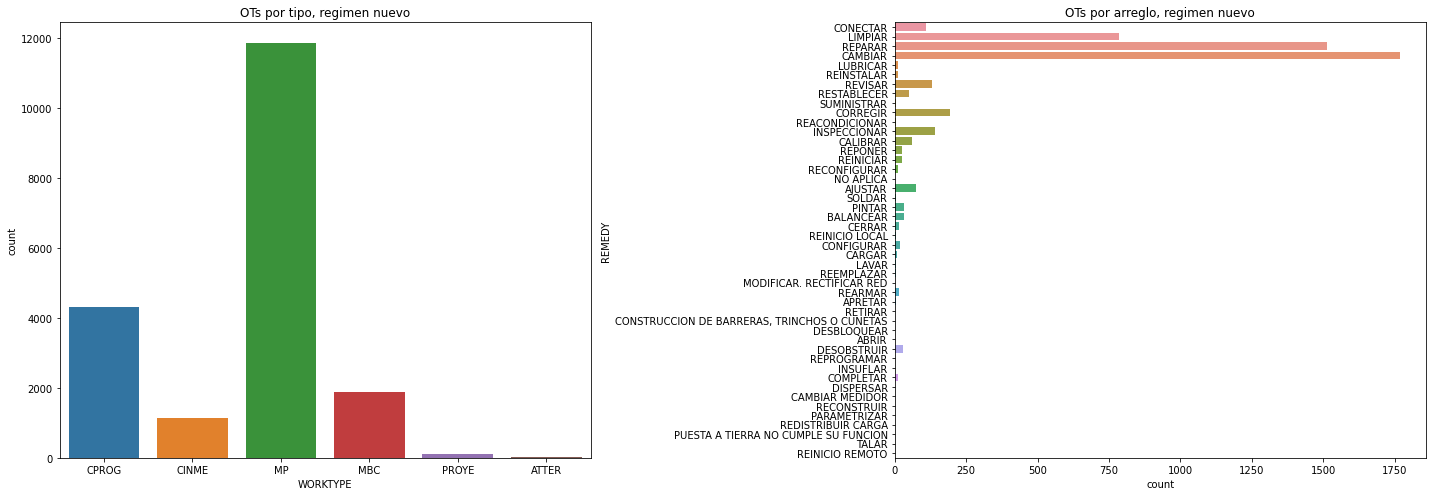

In [51]:
plt.figure(figsize = (20,7))

plt.subplot(121)
sns.countplot(x = ots.WORKTYPE)
plt.title('OTs por tipo, regimen nuevo')

plt.subplot(122)
sns.countplot(y = ots.REMEDY)
plt.title('OTs por arreglo, regimen nuevo')
plt.tight_layout();

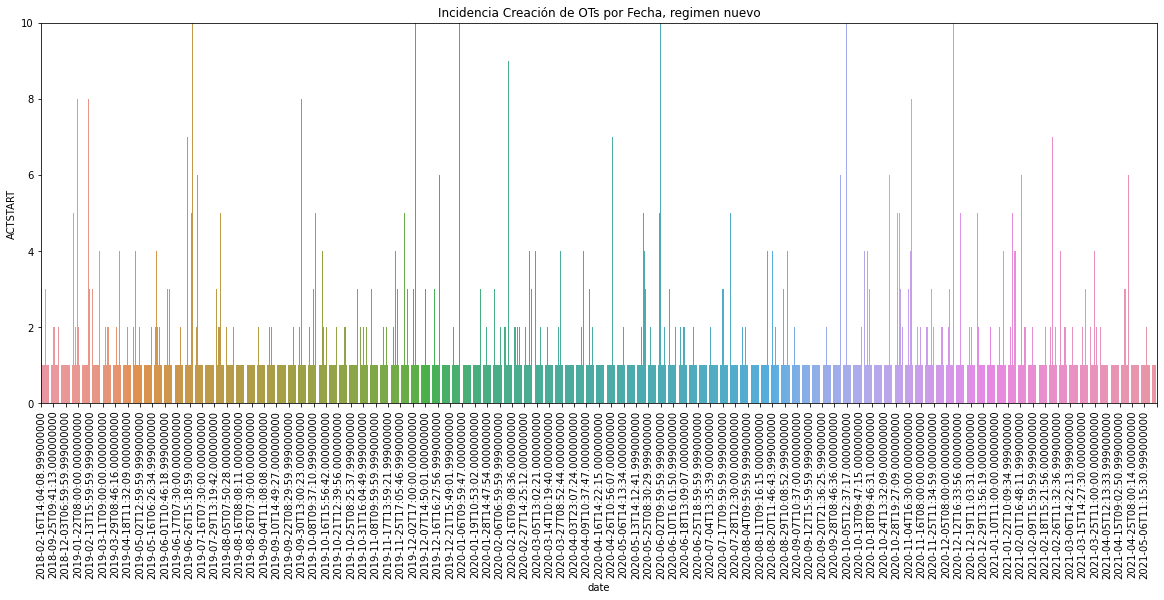

In [52]:
by_date = pd.DataFrame(ots.ACTSTART.value_counts())
by_date['date'] = by_date.index
by_date.sort_values(by = 'date', inplace = True)

plt.figure(figsize = (20, 7))
sns.barplot(y = 'ACTSTART', x = 'date', data = by_date)
plt.title('Incidencia Creación de OTs por Fecha, regimen nuevo')
plt.xticks(np.arange(13600, step = 150), rotation = 90)
plt.ylim(0,10)
plt.show();

In [53]:
ots.PROBLEM = ots.PROBLEM.astype(str)
ots.PROBLEMS = ots.PROBLEM.apply(lambda x: x.split(','))

<ipython-input-53-65c7e805815d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ots.PROBLEMS = ots.PROBLEM.apply(lambda x: x.split(','))


In [54]:
all_problems = []
for i in range(len(ots.PROBLEMS)):
	all_problems.append(ots.PROBLEMS[i])
all_problems_flat = [ item for elem in all_problems for item in elem]

from collections import Counter
dict = Counter(all_problems_flat)
problems = pd.DataFrame.from_dict(dict, orient = 'index')
problems.rename(columns = {0: 'Total'}, inplace = True)
problems.drop(index='nan', inplace=True)

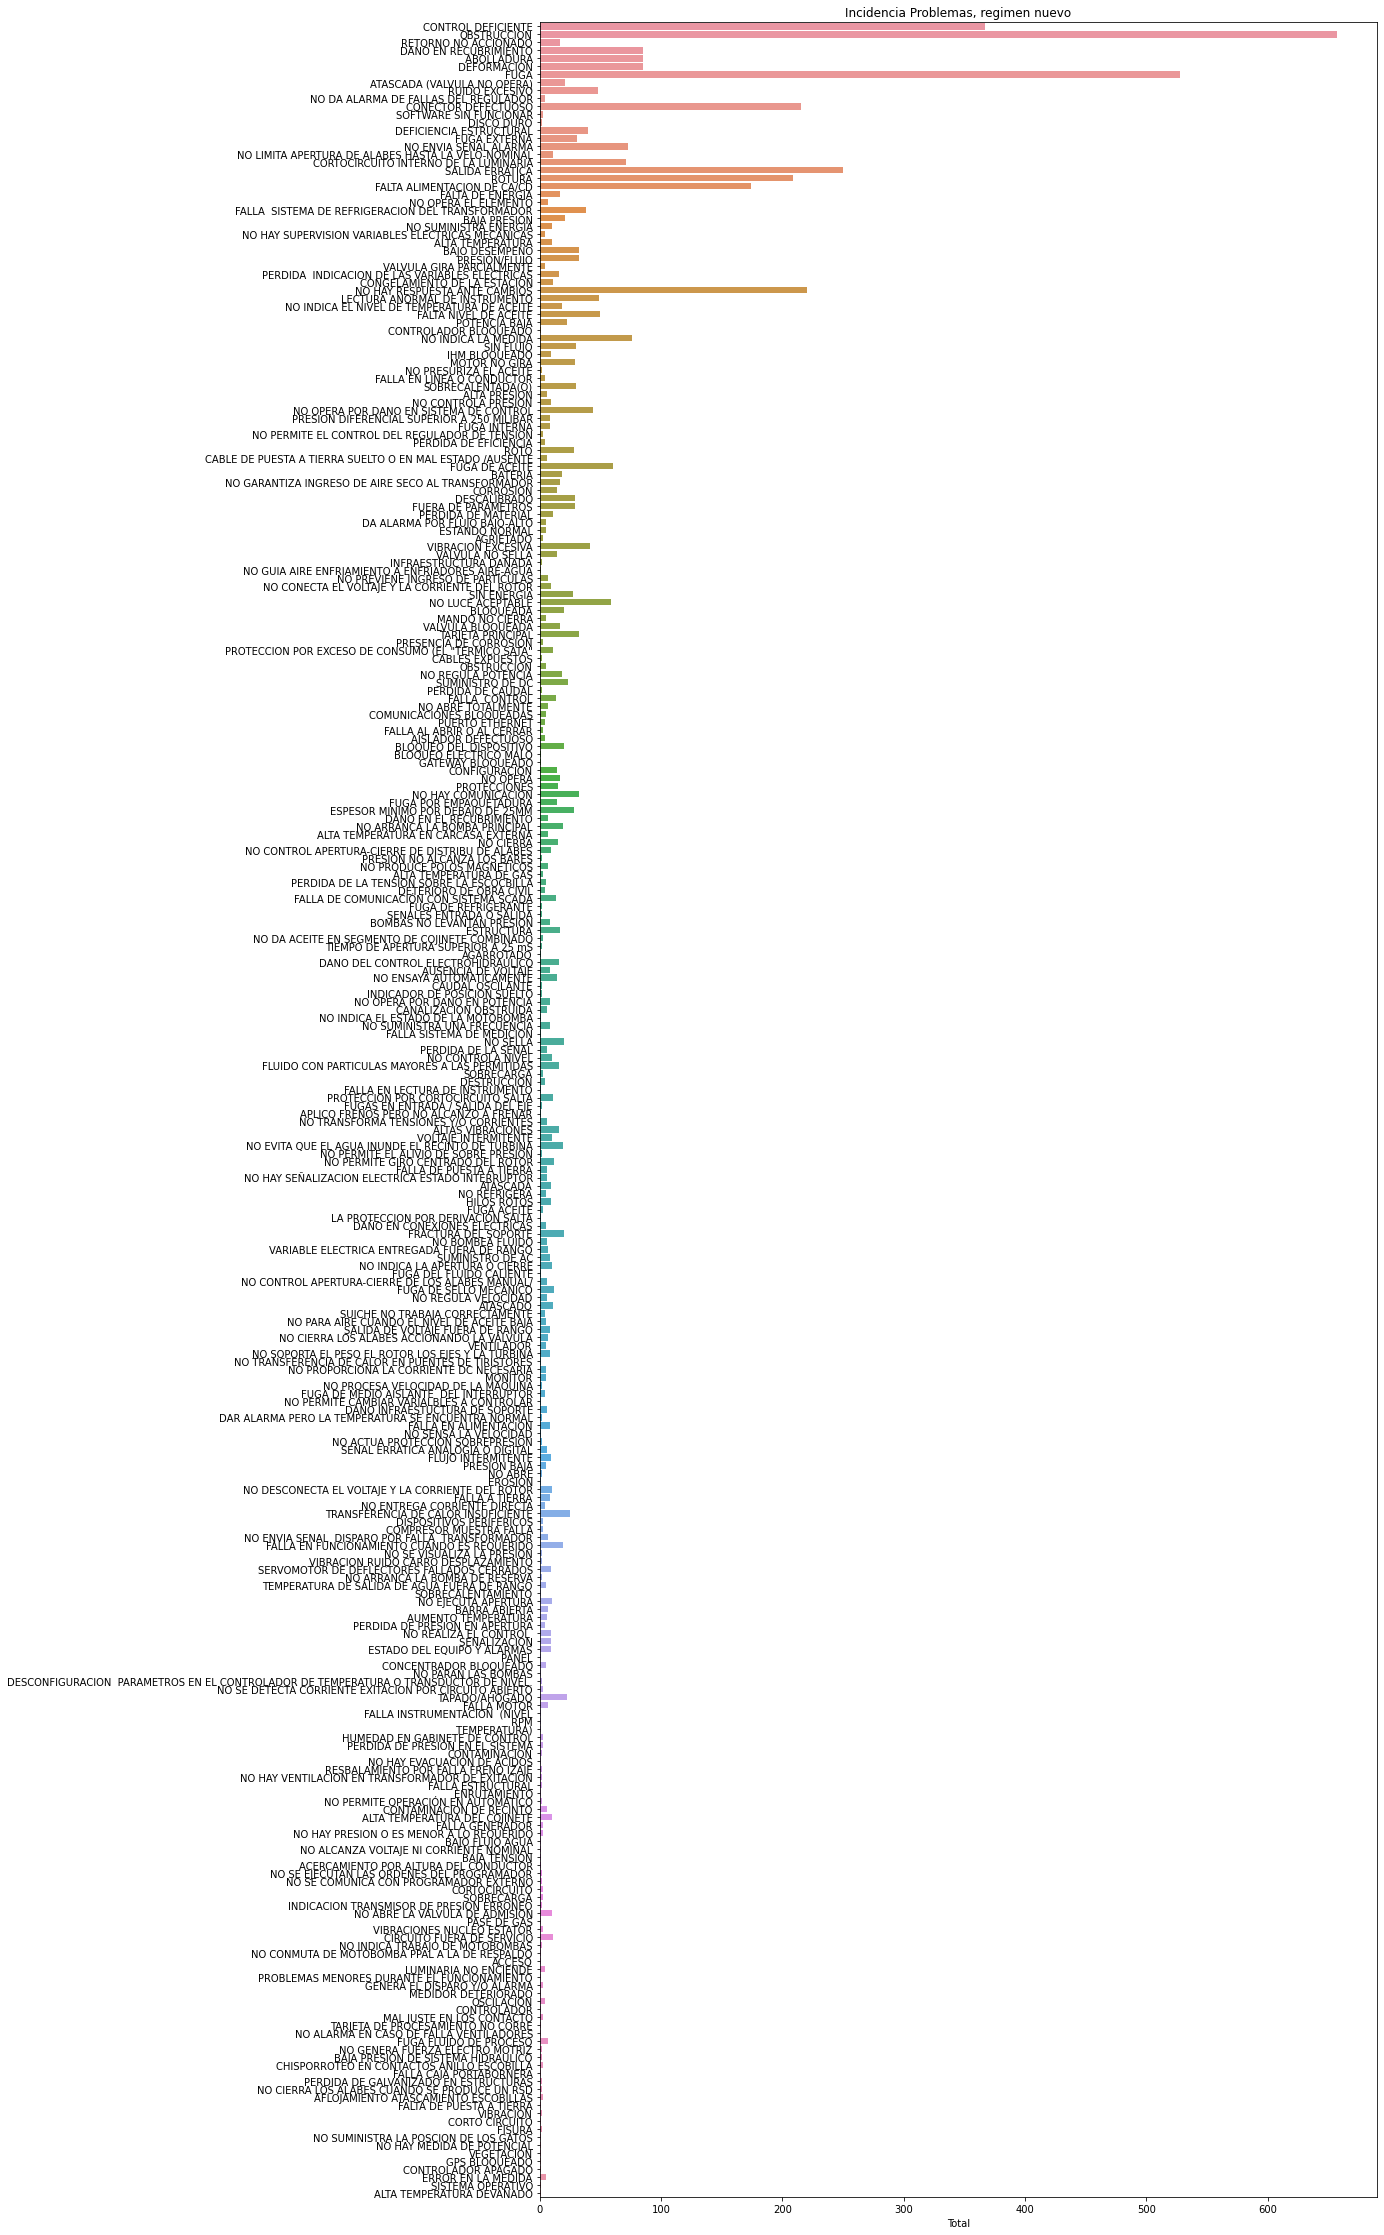

In [55]:
plt.figure(figsize = (15, 40))
sns.barplot(x = problems.Total, y = problems.index, data = problems)
plt.title('Incidencia Problemas, regimen nuevo')
plt.show();

In [56]:
ots.CAUSE = ots.CAUSE.astype(str)
ots.CAUSES = ots.CAUSE.apply(lambda x: x.split(','))

all_causes = []
for i in range(len(ots.CAUSES)):
	all_causes.append(ots.CAUSES[i])
all_causes_flat = [ item for elem in all_causes for item in elem]

#from collections import Counter
dict = Counter(all_causes_flat)
causes = pd.DataFrame.from_dict(dict, orient = 'index')
causes.rename(columns = {0: 'Total'}, inplace = True)
causes.drop(index='nan', inplace=True)

<ipython-input-56-405fb24c1600>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ots.CAUSES = ots.CAUSE.apply(lambda x: x.split(','))


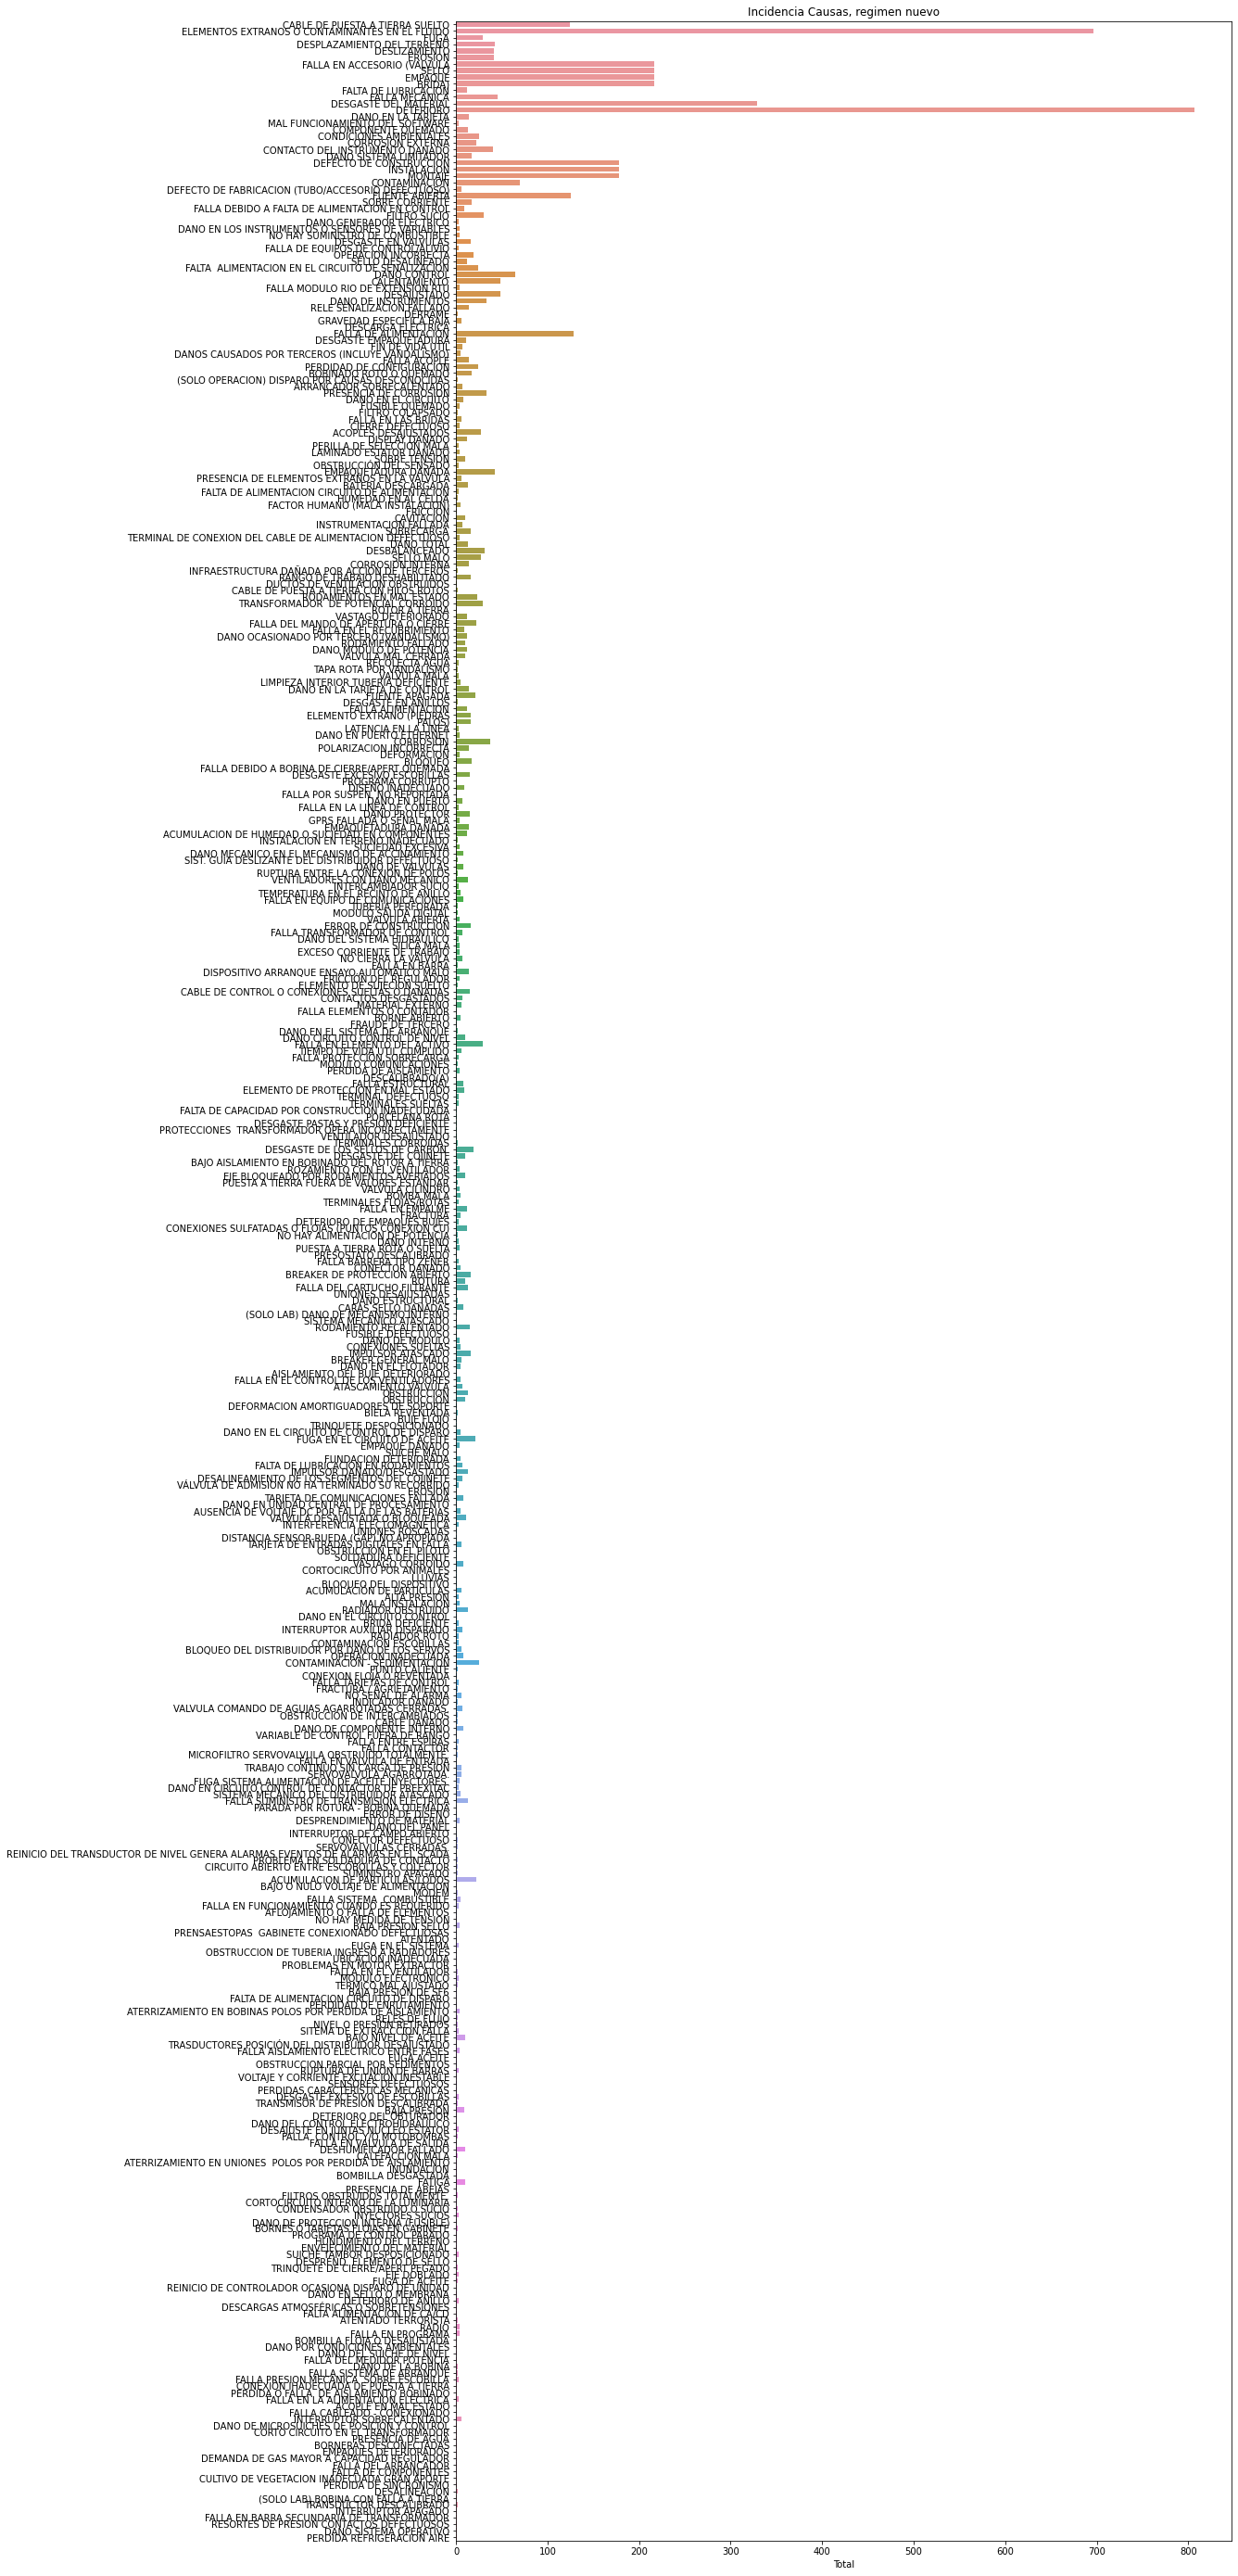

In [57]:
plt.figure(figsize = (15, 50))
sns.barplot(x = causes.Total, y = causes.index, data = causes)
plt.title('Incidencia Causas, regimen nuevo')
plt.show();

In [58]:
todos.head()

,ASSETNUM,WONUM,ACTSTART,ACTFINISH,WORKLOG,ANTIGUEDAD
9612,2976773.0,93702,2001-03-23 00:00:00.000,2001-03-23 00:00:00,NaN,Antiguo
2982,2976773.0,2192875,2012-11-16 00:00:00.000,2012-11-16 00:00:00,NaN,Antiguo
1053,2976774.0,1361312,2009-02-27 00:00:00.000,2009-02-27 00:00:00,NaN,Antiguo
67067,2976775,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24,10/03/2020 Se verifica el funcionamiento del ...,Reciente
69078,2976775,1739249,2020-03-10 16:08:49.999,2020-06-01 11:29:24,REVISAR ARCHIVO ADJUNTO.,Reciente


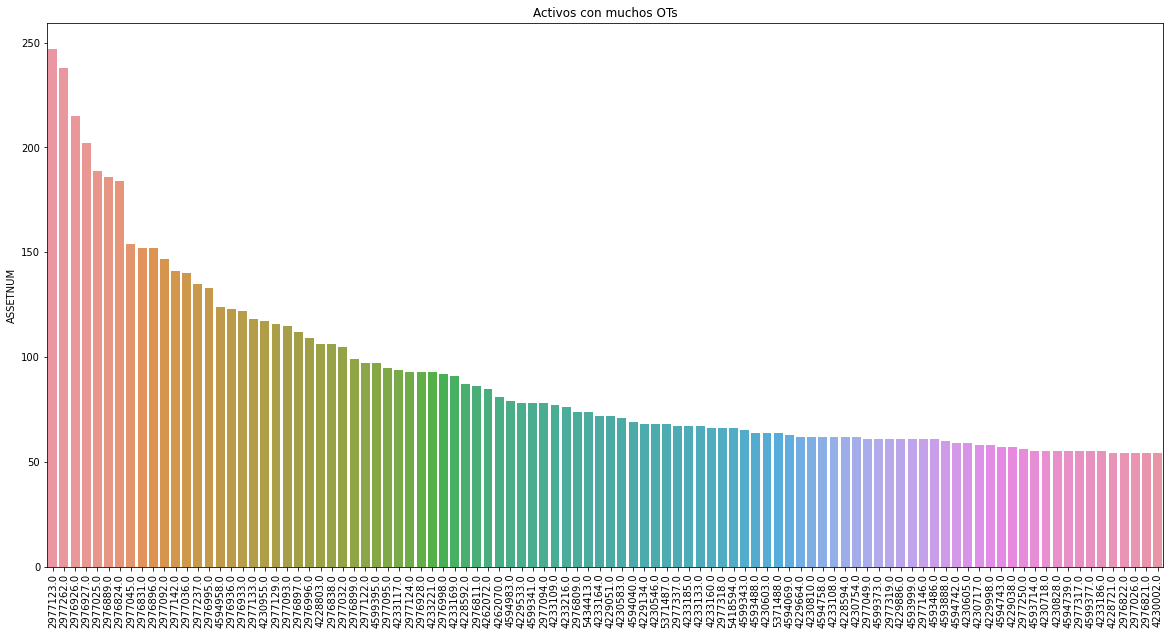

In [59]:
all_assets = pd.DataFrame(todos.ASSETNUM.value_counts())
top100 = all_assets.iloc[:100].copy()

plt.figure(figsize = (20,10))
sns.barplot(x = top100.index, y = top100.ASSETNUM, data=top100, order=top100.index)
plt.title('Activos con muchos OTs')
plt.xticks(rotation = 90);

In [60]:
top100assets = activos.loc[activos.ASSETNUM.isin(top100.index.tolist())]

In [61]:
top100.rename(columns = {'ASSETNUM': 'TOTAL'}, inplace = True)
top100['ASSETNUM'] = top100.index
top100['ASSETNUM'] = top100.ASSETNUM.astype(int)

In [62]:
top100daños = top100.merge(right=top100assets, how = 'left', on = 'ASSETNUM')

In [63]:
OTStop100 = pd.DataFrame(top100daños.groupby('DESCRIPTION').sum('TOTAL'))
OTStop100['DESC'] = OTStop100.index
OTStop100.sort_values(by='TOTAL', ascending=  False, inplace = True)

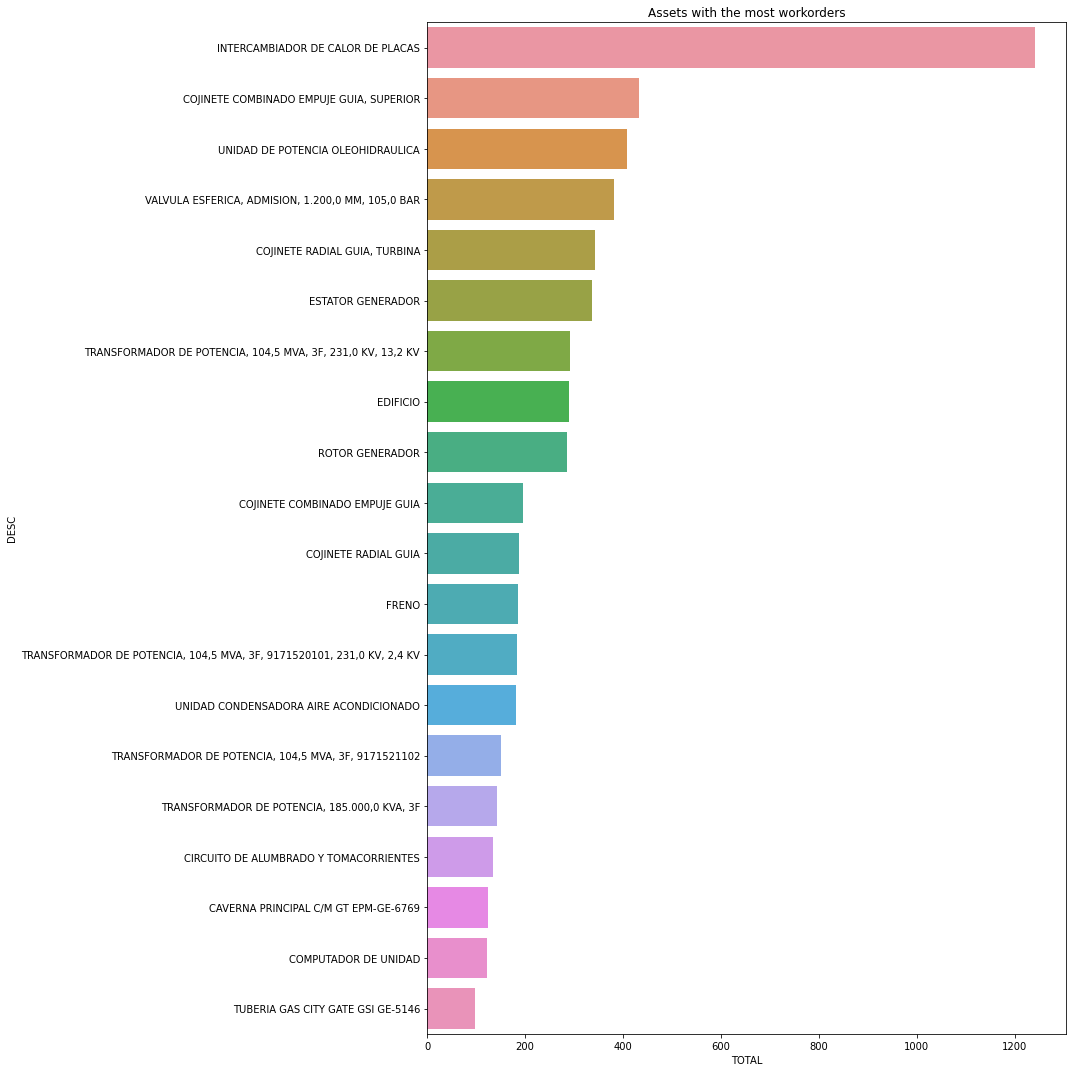

In [64]:
plt.figure(figsize = (15,15))
sns.barplot(x = 'TOTAL', y= 'DESC', data = OTStop100.iloc[:20])
plt.title('Assets with the most workorders')
plt.tight_layout();

<AxesSubplot:xlabel='count', ylabel='ANTIGUEDAD'>

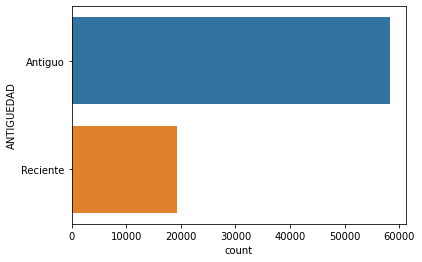

In [65]:
sns.countplot(y = todos.ANTIGUEDAD)

# Tokenizacion

In [ ]:
activos = pd.read_csv(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\Repoo\Data\Activos.csv', delimiter=';')
hist_ots = pd.read_csv(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\Repoo\Data\HistoricoAdjuntosActivosOT.csv', delimiter=';')
ots = pd.read_excel(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\Repoo\Data\RegistrosOrdenesDeTrabajo.xlsx')
todas_ots = pd.read_csv(r'C:\Users\USER\OneDrive - Universidad Nacional de Colombia\Documentos\DS4A\Proyecto Final\Repoo\Data\DataSetsProcesados\Relacion_ots_activo.csv')

In [66]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
#nltk.download('punkt')
#nltk.download('stopwords')

In [67]:
reports = todos.loc[~(todos.WORKLOG.isna())].copy()

In [68]:
reports['tokenized'] = reports.WORKLOG.apply(lambda x: nltk.tokenize.word_tokenize(x))

In [69]:
for i in range(len(reports.WORKLOG)):
	reports.tokenized[i] = [word for word in reports.tokenized[i] if '1' not in word]
	reports.tokenized[i] = [word for word in reports.tokenized[i] if word not in stopwords]

KeyError: 0

In [ ]:
reports.head()